In [90]:
import sys
sys.path.append("/home/huaqingj/MyResearch/TVDN")

In [91]:
from pyTVDN import TVDNDetect
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from pyTVDN.TVDNutils import GetBsplineEst
from scipy.signal import detrend
%matplotlib inline

In [92]:
resDir = Path("../results")
dataDir = Path("../data")

In [93]:
filname = Path("fMRI_samples.mat")
fMRIs = loadmat(dataDir/filname)["clean_subjects"]

## Obtain the dataset

In [94]:
fMRI = fMRIs[0, 9]["fMRI"][:90, :]

## 1. Detection with No Bspline

1. Detrend the observation
2. No B-spline
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [95]:
fMRIdetNoSpl = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=20, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=50, Lmin=1, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 1,
 'MaxM': 50,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 20}


In [96]:
fMRIdetNoSpl._Preprocess()

In [97]:
d, n = fMRIdetNoSpl.nYmat.shape
T = fMRIdetNoSpl.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdetNoSpl.nYmat

In [98]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdetNoSpl.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [99]:
fMRIdetNoSpl.dXmat, fMRIdetNoSpl.Xmat = dXmat, Xmat

In [100]:
fMRIdetNoSpl()

In [101]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdetNoSpl.TuningKappa(kappas)

In [102]:
print("The optimal kappas are:", fMRIdetNoSpl.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdetNoSpl.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdetNoSpl.optNumChg)

The optimal kappas are: 1.4100000000000004
The optimal number of change point under the range of kappa we speicified is: 19
The optimal number of change point is: 12


In [103]:
fMRIdetNoSpl.UpdateEcpts(20)
print(fMRIdetNoSpl)

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      20     | [  9.  17.  25.  33.  42.  50.  59.  68.  76.  85.  94. 103. 112. 121. | 1.3745027340668179 |  20  |
|             |                     130. 138. 146. 154. 163. 171.]                     |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [44 33 89 62 32].


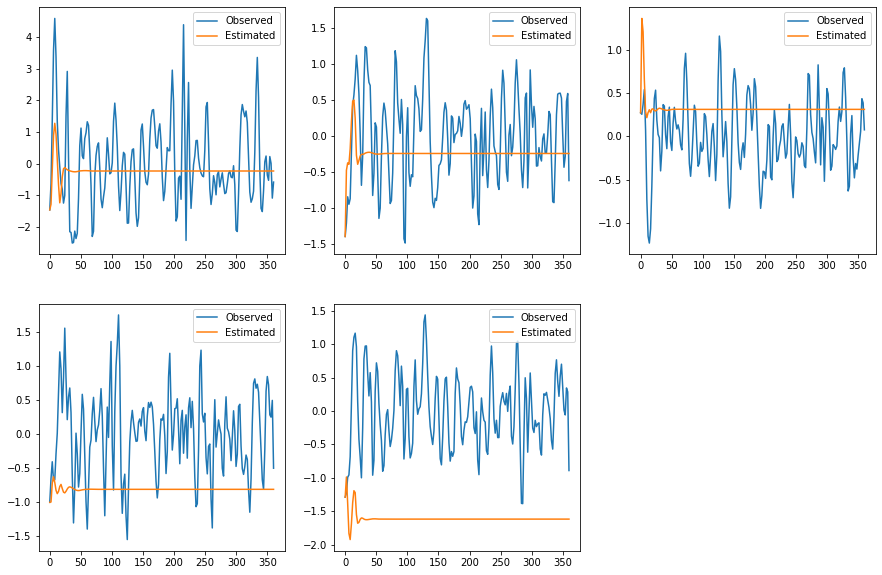

In [104]:
fMRIdetNoSpl.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [105]:
fMRIdetNoSpl.RecResCur.EstXmatReal = detrend(fMRIdetNoSpl.RecResCur.EstXmatReal)

The plot indices are [48, 2, 60, 76, 9].


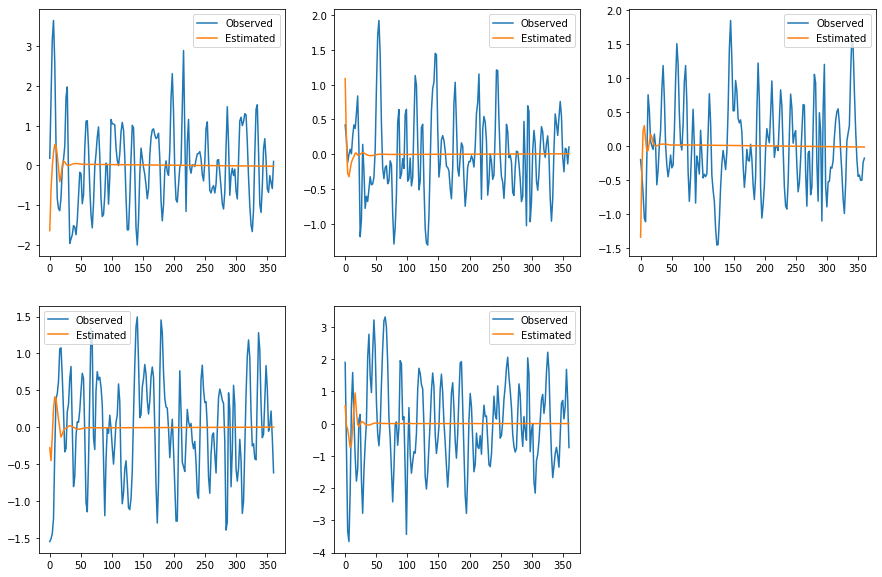

In [106]:
fMRIdetNoSpl.PlotRecCurve(idxs=[48, 2, 60, 76, 9])

## 2. Detection with  B-spline seperate on `Xmat` and `dXmat`

2. Detrend the observation
1. Do b-spline seperately on `Xmat`(`1e-6`) and `dXmat`(`8e-5`)
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [107]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=20, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=40, Lmin=2, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 2,
 'MaxM': 40,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 20}


In [108]:
fMRIdet._Preprocess()

In [109]:
d, n = fMRIdet.nYmat.shape
T = fMRIdet.paras.T
time = np.linspace(0, T, n)
Xmat = fMRIdet.nYmat

In [110]:
deltaT = np.diff(time)[0]
dXmat0 = np.diff(fMRIdet.nYmat, axis=1)/deltaT
dXmatLast = np.mean(dXmat0, axis=1).reshape(90, 1)
dXmat = np.concatenate((dXmat0, dXmatLast), axis=1)

In [111]:
_, Xmat = GetBsplineEst(Xmat, time, lamb=1e-6)
_, dXmat = GetBsplineEst(dXmat, time, lamb=8e-5)

In [112]:
fMRIdet.dXmat, fMRIdet.Xmat = dXmat, Xmat

In [113]:
fMRIdet()

In [114]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [115]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 10
The optimal number of change point is: 10


In [116]:
fMRIdet.UpdateEcpts(20)
print(fMRIdet)

+-------------+------------------------------------------------------------------------+--------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE         | Rank |
+-------------+------------------------------------------------------------------------+--------------------+------+
|      20     | [  9.  16.  26.  37.  44.  55.  62.  73.  80.  89.  96. 105. 110. 123. | 1.3862101903026294 |  20  |
|             |                     130. 143. 150. 161. 169. 175.]                     |                    |      |
+-------------+------------------------------------------------------------------------+--------------------+------+


### No detrended reconstructed curve

The plot indices are [ 0 73 15 87 32].


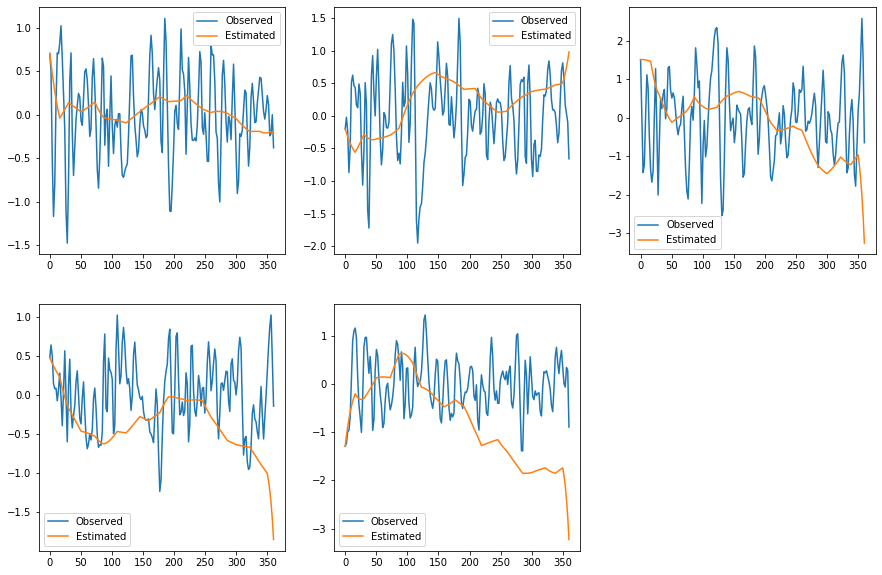

In [117]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [118]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [31, 34, 72, 79, 4].


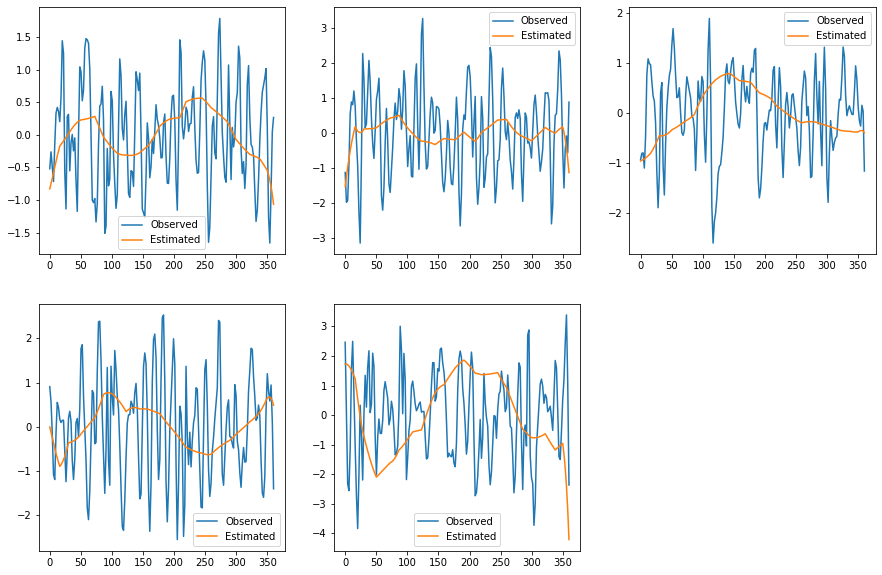

In [119]:
fMRIdet.PlotRecCurve(idxs=[31, 34, 72, 79, 4])

## 3. Detection with  B-spline  (`8e-5`)

1. Detrend the observation
2. B-spline with `8e-5`
3. Do the detection
4. Plot the (detrended) observed `Ymat` and reconstructed `Xmat`

In [120]:
fMRIdet = TVDNDetect(Ymat=fMRI, saveDir=None, dataType="fMRI", fName="fMRIsample", showProgress=True,
                     r=20, kappa=1.65, fct=0.5, lamb=8e-5, plotfct=180, downRate=4, MaxM=40, Lmin=2, freq=0.5, is_detrend=True)

The parameters for detection are:
{'Lmin': 2,
 'MaxM': 40,
 'T': 2,
 'decimateRate': None,
 'downRate': 4,
 'fName': 'fMRIsample',
 'fct': 0.5,
 'freq': 0.5,
 'is_detrend': True,
 'kappa': 1.65,
 'lamb': 8e-05,
 'plotfct': 180,
 'r': 20}


In [121]:
fMRIdet()

In [122]:
kappas = np.arange(1.0, 2.0, step=0.01)
fMRIdet.TuningKappa(kappas)

In [123]:
print("The optimal kappas are:", fMRIdet.optKappa)
print("The optimal number of change point under the range of kappa we speicified is:", fMRIdet.optKappaOptNumChg)
print("The optimal number of change point is:", fMRIdet.optNumChg)

The optimal kappas are: 1.0
The optimal number of change point under the range of kappa we speicified is: 9
The optimal number of change point is: 9


In [124]:
fMRIdet.UpdateEcpts(20)
print(fMRIdet)

+-------------+------------------------------------------------------------------------+-------------------+------+
| Num of CPTs |                             Estiamted CPTs                             |        MSE        | Rank |
+-------------+------------------------------------------------------------------------+-------------------+------+
|      20     | [  2.   4.  15.  27.  29.  31.  43.  45.  60.  80.  92.  94. 110. 131. | 5.557016427994923 |  20  |
|             |                     133. 136. 150. 163. 176. 178.]                     |                   |      |
+-------------+------------------------------------------------------------------------+-------------------+------+


### No detrended reconstructed curve

The plot indices are [72 79 80 33 76].


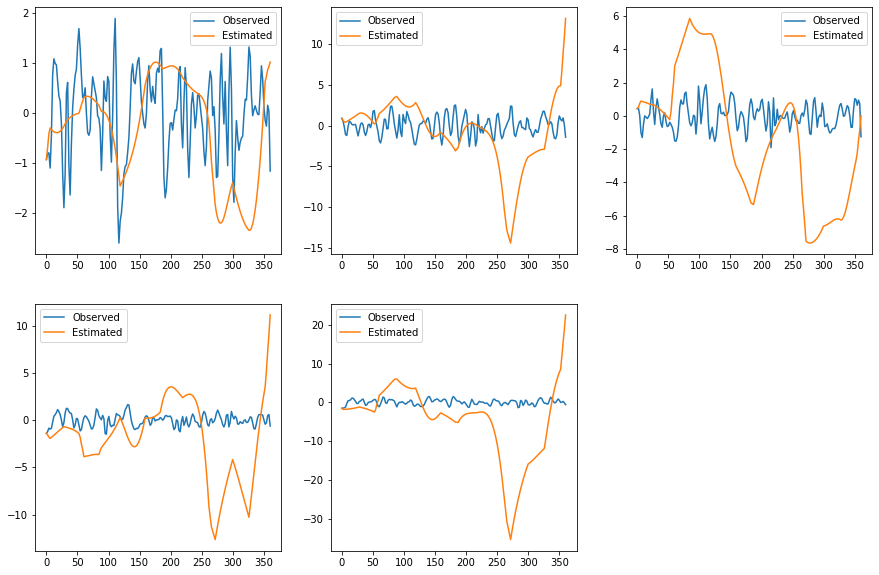

In [125]:
fMRIdet.PlotRecCurve()

### Detrend the estimated `Xmat` and plot the results

In [126]:
fMRIdet.RecResCur.EstXmatReal = detrend(fMRIdet.RecResCur.EstXmatReal)

The plot indices are [51, 28, 35, 62, 26].


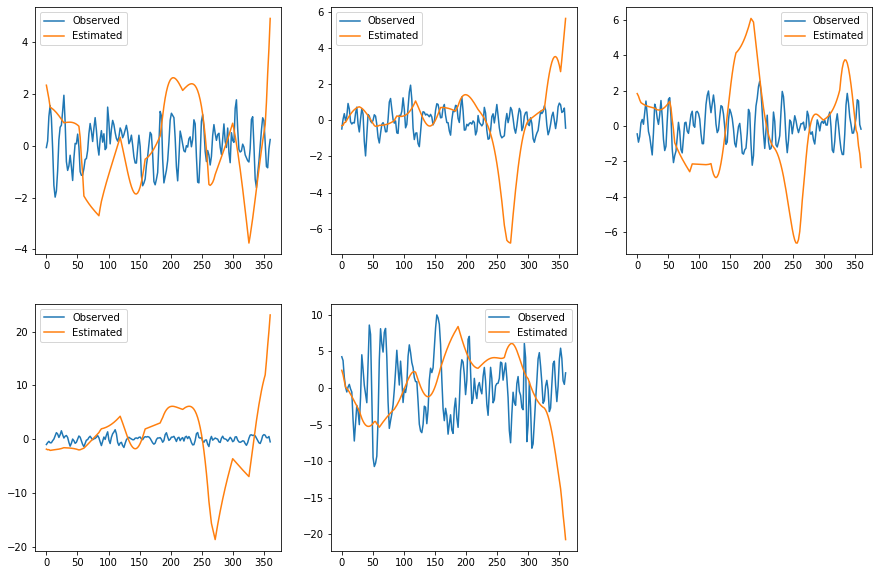

In [127]:
fMRIdet.PlotRecCurve(idxs=[51, 28, 35, 62, 26])